In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("DBPEDIA_train.csv")

In [4]:
vectorizer = TfidfVectorizer(stop_words='english',
                             strip_accents='unicode',
                             norm='l2',
                             )

In [5]:
X_train = []
for i in range(len(df)):
  string = df['text'][i]            
  string = vectorizer.build_preprocessor()(string.lower()) 
  string = vectorizer.build_tokenizer()(string.lower())
  X_train.append(' '.join(string))

In [6]:
df_test = pd.read_csv("DBPEDIA_test.csv")

In [7]:
X_test = []
for i in range(len(df_test)):
  string = df_test['text'][i]
  string = vectorizer.build_preprocessor()(string.lower())
  string=vectorizer.build_tokenizer()(string.lower())
  X_test.append(' '.join(string))

In [8]:
X_train = vectorizer.fit_transform(X_train)

In [9]:
X_test = vectorizer.transform(X_test)

In [10]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['label_l1'] = LE.fit_transform(df['l1'])
df.head(1)

,text,l1,l2,l3,label_l1
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator,0


In [12]:
df_test['label_l1'] = LE.transform(df_test['l1'])

In [13]:
y_train = df['label_l1']
y_test = df_test['label_l1']

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

C:\Users\khair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
predicted_label_test = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [ ]:
loss_values = clf.loss_curve_
print(loss_values)

0.9765930848438991


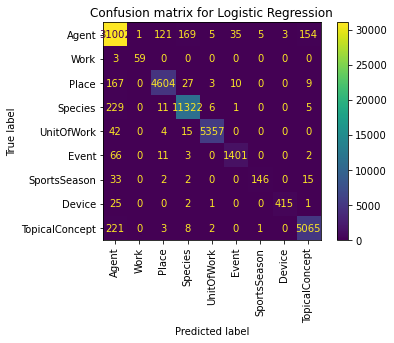

                precision    recall  f1-score   support

         Agent       0.98      0.98      0.98     31495
          Work       0.98      0.95      0.97        62
         Place       0.97      0.96      0.96      4820
       Species       0.98      0.98      0.98     11574
    UnitOfWork       1.00      0.99      0.99      5418
         Event       0.97      0.94      0.96      1483
  SportsSeason       0.96      0.74      0.83       198
        Device       0.99      0.93      0.96       444
TopicalConcept       0.96      0.96      0.96      5300

      accuracy                           0.98     60794
     macro avg       0.98      0.94      0.95     60794
  weighted avg       0.98      0.98      0.98     60794



In [39]:
accuracy = accuracy_score(y_pred=predicted_label_test, y_true=y_test)
cm = confusion_matrix(y_pred=predicted_label_test, y_true= y_test, labels= clf.classes_)
print(accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Confusion matrix for Logistic Regression")
disp.ax_.xaxis.set_ticklabels(['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']) 
disp.ax_.yaxis.set_ticklabels(['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']);
plt.xticks(rotation = 90)
plt.show()
print(classification_report(y_test, predicted_label_test, target_names= ['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
svm = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
predicted_label_test = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred=predicted_label_test, y_true=y_test)
cm = confusion_matrix(y_pred=predicted_label_test, y_true= y_test, labels= clf.classes_)
print(accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Confusion matrix for SVM")
disp.ax_.xaxis.set_ticklabels(['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']) 
disp.ax_.yaxis.set_ticklabels(['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']);
plt.xticks(rotation = 90)
plt.show()
print(classification_report(y_test, predicted_label_test, target_names= ['Agent', 'Work', 'Place', 'Species', 'UnitOfWork', 'Event',
   'SportsSeason', 'Device', 'TopicalConcept']))

In [14]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(32, 32),
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True)

model.fit(X_train, y_train)
pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, pred_test) * 100.
loss_values = model.loss_curve_
print (loss_values)

NameError: name 'accuracy_score' is not defined

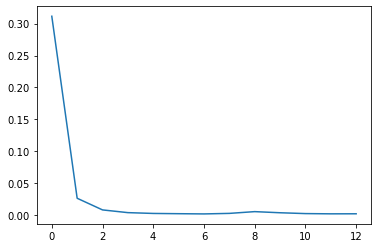

In [18]:
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.show()